<a href="https://colab.research.google.com/github/JuanM-GG/Biologia-de-sistemas/blob/main/optimizacion_parametrica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Optimización paramétrica

Nombre: Biología de sistemas 

Fecha: 7 de diciembre

Cargar Grind.R

In [29]:
install.packages("deSolve")
install.packages("FME")
install.packages("rootSolve")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
source("Grind.R")

grind.R was sourced


Establecer modelo

In [17]:
model <- function(time, state, parms) {
  with(as.list(c(state,parms)),{

    dx <- xpre*kprodEprod - x*kdegEdeg - x*y*kdimEdim + (ytot-y)*kdisEdis
    dy <- - x*y*kdimEdim + (ytot-y)*kdisEdis
    dxy <- - dy
    return(list(c(dx, dy, dxy)))
  })
}

Declarar primer estimación para los parámetros

In [7]:
p <- c(xpre = 10, kprodEprod = 0.5, kdegEdeg = 0.5, kdimEdim = 10, kdisEdis = 1, ytot = 6)

Establecer condiciones iniciales (las cuales, efectivamente, son parámetros)

In [8]:
s <- c(x = 0, y = 5, xy = 1)

Introducir datos experimentales

In [9]:
t_exp <- c(0, 1, 3, 6)
xy_exp <- c(0.5, 2.5, 3, 1.8)/0.5 

Guardar en un dataframe (necesario para usar la función fit()). Los nombres de las variables en el dataframe deben ser igual a sus nombres en el modelo

In [10]:
data <- data.frame(time = t_exp, xy = xy_exp)

Correr la optimización

SSR: 5.217441  Estimates:
kdimEdim     ytot 
194.4604 250.7686 


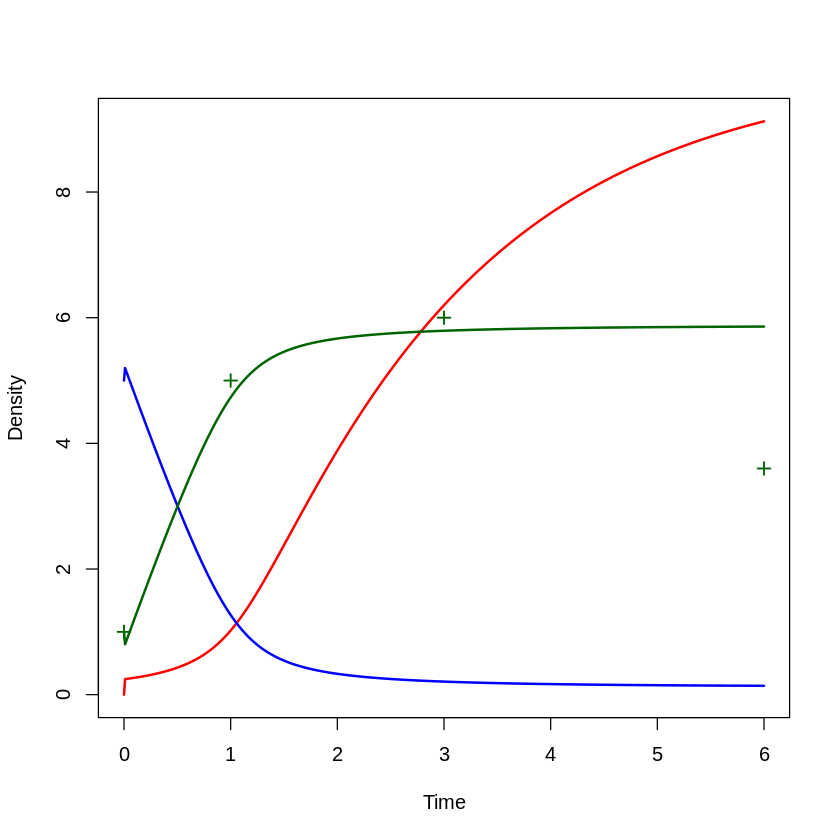

In [18]:
w <- c("kdimEdim", "ytot") # w contiene los nombres de los parámetros libres
f <- fit(legend = FALSE, free = w, tstep = 0.01)

Revisar error estándar, estadístico t, valor p, etc. 

In [21]:
summary(f)


Parameters:
         Estimate Std. Error t value Pr(>|t|)
kdimEdim    194.5      222.8   0.873    0.475
ytot        250.8      290.3   0.864    0.479

Residual standard error: 1.615 on 2 degrees of freedom

Parameter correlation:
         kdimEdim    ytot
kdimEdim   1.0000 -0.9985
ytot      -0.9985  1.0000

Es posible revisar los resultados del ejemplo con f$par

In [22]:
f$par
f$ssr

kdimEdim     ytot 
194.4604 250.7686

[1] 5.217441